In [28]:
import pandas as pd
import numpy as np
import datetime as dt
import webbrowser


import matplotlib.pyplot as plt
#import seaborn.apionly as sns

#pd.set_option('max_columns', 50)
%matplotlib inline

In [3]:
#Import files
dec = pd.read_csv("H:\\Nicole & Riccardo - Behavioral Data\Data Files (Txt)\Master Source Data\RN_Mobile_USUK_AppWebUsage_Dec2015.txt", sep='\t', nrows=1000000)

In [4]:
dec.head()

,PaM_Id,PID,LocalDateTime,LocalTimeZone,AppName,Appname_clean,Category,AppExclusion_Flag,BaseURL,SubDomain,Domain,TimeSpent_Seconds,Imputed_Web,DeviceType,Device_Name,Market,OS,Weight,EngagementBand,Local_UsageTime,Local_UsageDate,CST_Time,CST_UsageTime,CST_UsageDate,Search_Term,WebCategory1,WebCategory2,WebCategory3,DataSource
0,212323,30039590,2015-12-25 04:48:12,PST,NaN,NaN,NaN,NaN,bloody-disgusting.com,bloody-disgusting.com,bloody-disgusting.com,60,NaN,Phone,HTC HTC One,US,Android,2.92701,4,04:48:12,12/25/2015,2015-12-25 06:48:12,06:48:12,12/25/2015,NaN,Entertainment,NaN,NaN,Web
1,212323,30039590,2015-12-25 05:31:15,PST,NaN,NaN,NaN,NaN,steamcommunity.com,steamcommunity.com,steamcommunity.com,1384,NaN,Phone,HTC HTC One,US,Android,2.92701,4,05:31:15,12/25/2015,2015-12-25 07:31:15,07:31:15,12/25/2015,NaN,Computers and Internet,NaN,NaN,Web
2,212323,30039590,2015-12-26 02:49:06,PST,NaN,NaN,NaN,NaN,rarbg.to,rarbg.to,rarbg.to,23,NaN,Phone,HTC HTC One,US,Android,2.92701,4,02:49:06,12/26/2015,2015-12-26 04:49:06,04:49:06,12/26/2015,NaN,NaN,NaN,NaN,Web
3,212323,30039590,2015-12-26 02:52:43,PST,NaN,NaN,NaN,NaN,mobile.twitter.com,mobile.twitter.com,twitter.com,42,NaN,Phone,HTC HTC One,US,Android,2.92701,4,02:52:43,12/26/2015,2015-12-26 04:52:43,04:52:43,12/26/2015,NaN,Computers and Internet,NaN,NaN,Web
4,212323,30039590,2015-12-26 02:56:39,PST,NaN,NaN,NaN,NaN,mobile.twitter.com,mobile.twitter.com,twitter.com,34,NaN,Phone,HTC HTC One,US,Android,2.92701,4,02:56:39,12/26/2015,2015-12-26 04:56:39,04:56:39,12/26/2015,NaN,Computers and Internet,NaN,NaN,Web


# -1. Eliminating mistakenly opened apps
#### Generate histogram of time spent per app session by Pam_ID and by appname for all sessions throughout the month

In [5]:
#subset datafile by only columns necessary, and rows for App only
hist_dec = dec[['PaM_Id','Appname_clean','TimeSpent_Seconds','DeviceType','DataSource']].loc[dec.DataSource == "App"]
hist_dec.PaM_Id = hist_dec.PaM_Id.astype(str)
hist_dec.head()

,PaM_Id,Appname_clean,TimeSpent_Seconds,DeviceType,DataSource
140,212323,Hangouts,114,Phone,App
160,212323,HTC Sense Home,17,Phone,App
162,212323,Hangouts,121,Phone,App
163,212323,Hangouts,75,Phone,App
164,212323,Internet,235,Phone,App


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013A2A160>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000215B6908>], dtype=object)

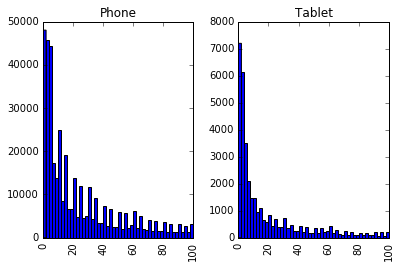

In [6]:
hist_dec.hist(by='DeviceType', column = "TimeSpent_Seconds", range=[0,100], bins=50)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000227DBEB8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000EC2E978>], dtype=object)

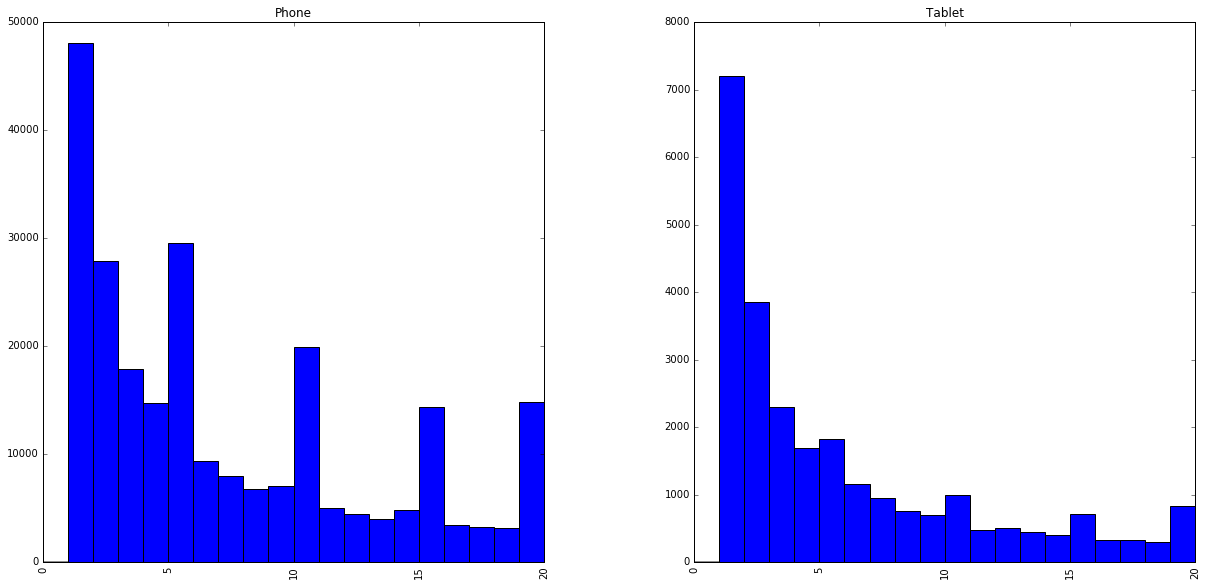

In [27]:
hist_dec.hist(by='DeviceType', column = "TimeSpent_Seconds", range=[0,20], bins=20, figsize = (20,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015162A58>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000001A5E34E0>], dtype=object)

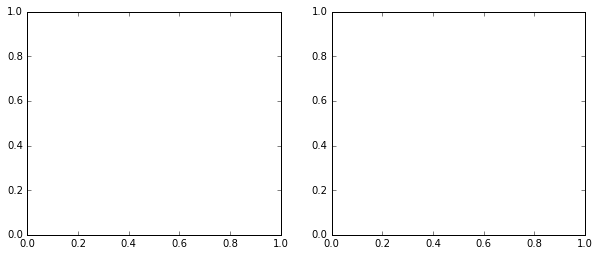

In [34]:
#let's normalize this histogram so sum of columns = 100%

#plt.subplots() is a function that returns a tuple containing a figure and axes object(s).  Thus when using fig, ax = plt.subplots() 
# you unpack this tuple into the variables fig and ax. 
# Having fig is useful if you want to change figure-level attributes or save the figure as an image file later 
# (e.g. with fig.savefig('yourfilename.png').
fig, ax = plt.subplots(1,2, figsize=(10,4)) # one row, two columns, figure size
ax

In [78]:
#the np.histogram function computes a typle of 1) the occurrences of input data that fall within each bin and
# 2) the area of each bar
hist, bins = np.histogram(hist_dec.TimeSpent_Seconds, bins=1000, range=(0,1000))
np.histogram(hist_dec.TimeSpent_Seconds , bins=100, range=(0,100))

(array([    0, 55244, 31692, 20214, 16382, 31399, 10526,  8917,  7547,
         7772, 20907,  5478,  4987,  4461,  5209, 15088,  3758,  3591,
         3482,  3805, 11805,  2929,  2748,  2514,  3097,  9579,  2582,
         2397,  2417,  3060,  9200,  3153,  2538,  2198,  2395,  7244,
         1858,  1711,  1615,  1966,  6209,  1557,  1420,  1383,  1658,
         5382,  1393,  1294,  1156,  1449,  4956,  1242,  1197,  1105,
         1426,  4533,  1292,  1196,  1158,  1937,  4925,  1643,  1296,
         1226,  1332,  3897,  1154,   956,   887,  1028,  3363,   924,
          884,   869,   959,  3108,   919,   782,   734,   870,  2862,
          837,   710,   671,   782,  2667,   752,   662,   645,   742,
         2518,   763,   670,   605,   723,  2258,   688,   577,   598,  2840], dtype=int64),
 array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
           9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
          18.,   19.,   20.,   21.,   22.,   23.,   24.

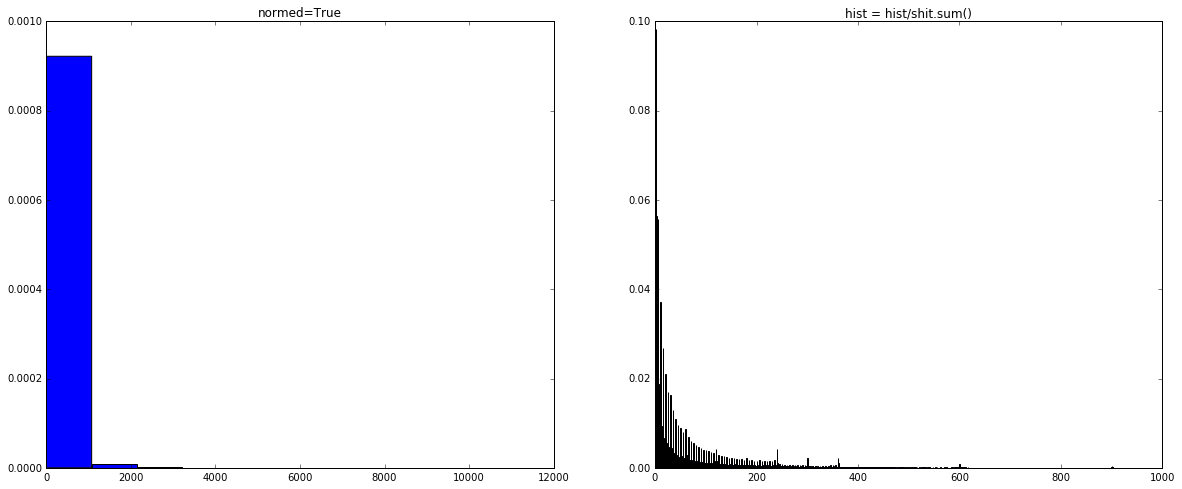

In [79]:
#Now we build the graph
#ax[1] references the second chart object from above, then we add the bar command, plt.bar(x, y, align='center')

fig, ax = plt.subplots(1,2, figsize=(20,8)) # one row, two columns, figure size

ax[0].hist(hist_dec.TimeSpent_Seconds, normed=True)


ax[1].bar(bins[:-1],hist.astype(np.float32) / hist.sum() ,width=(bins[1]-bins[0]))

ax[0].set_title('normed=True')
ax[1].set_title('hist = hist/shit.sum()')

#### Okay this doesn't really tell me much, doesn't look like a large dropoff - what about by individual pam_ID?

### Multiple statistics per group

In [100]:
# find min and max by pam_id and by devicetype across app times
grouped = hist_dec.groupby(['PaM_Id','DeviceType']).TimeSpent_Seconds.agg([np.min, np.max, np.mean, np.std, np.size]).reset_index()
grouped.head()

,PaM_Id,DeviceType,amin,amax,mean,std,size
0,1432809,Phone,1,5796,132.739837,462.517747,246
1,1436224,Tablet,5,361,119.405941,93.159677,303
2,1436994,Phone,5,5096,279.001222,532.756761,818
3,1437828,Phone,5,1902,89.749493,147.334983,986
4,1437944,Tablet,5,355,118.741396,87.204298,1017


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000461B31D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000EAEE9E8>], dtype=object)

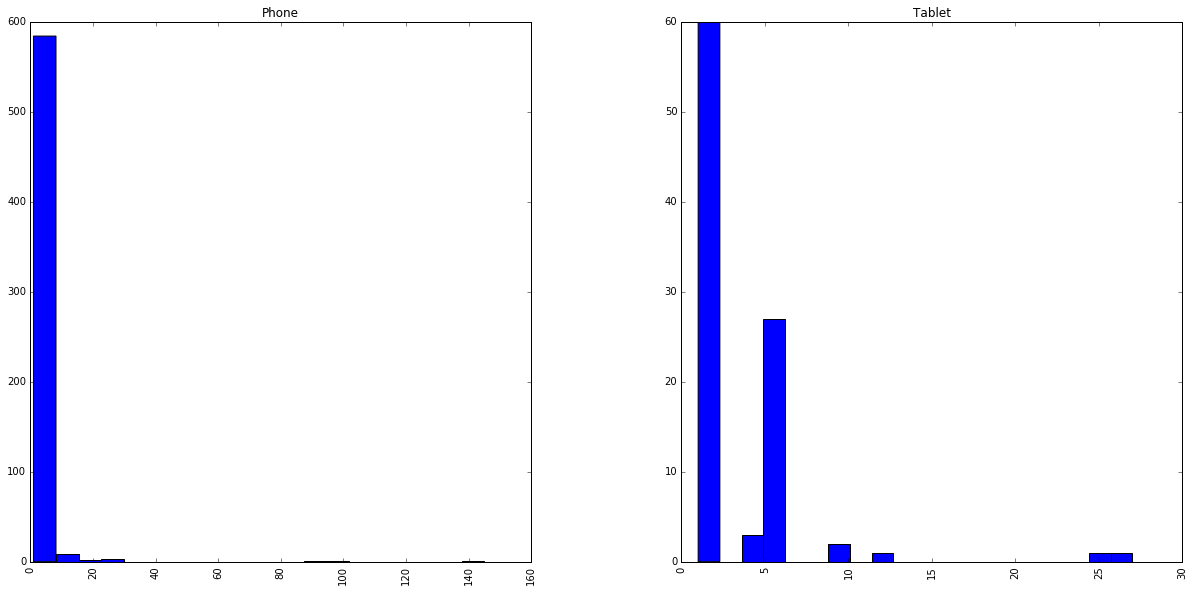

In [101]:
grouped.hist(by='DeviceType', column = "amin", 
#             range=[0,20], 
             bins=20, figsize = (20,10))

In [14]:

 
#np.histogram([1, 2, 1], bins=[0, 1, 2, 3])

NameError: name 'grouped' is not defined